# 3. Process the Image 

* convert to gray
* apply a Gaussian adaptive threshold 
* remove noise 

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

546


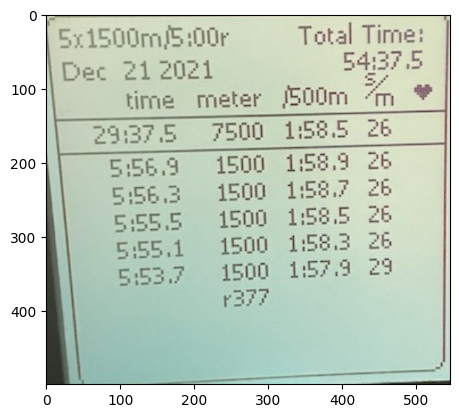

In [3]:
image_id = 5
file_name = f'temp/cr_erg0{str(image_id)}.jpg'
image = cv2.imread(file_name)
print(len(image[0]))
plt.imshow(image)


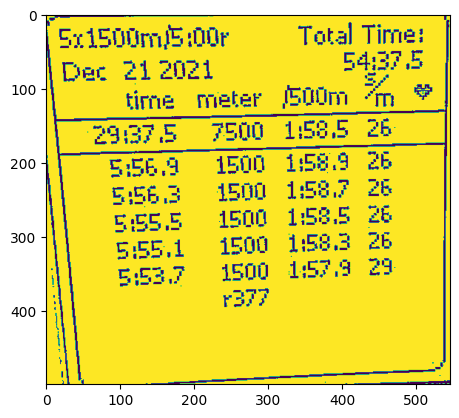

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bw_gaussian = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,6)
plt.imshow(bw_gaussian)

True

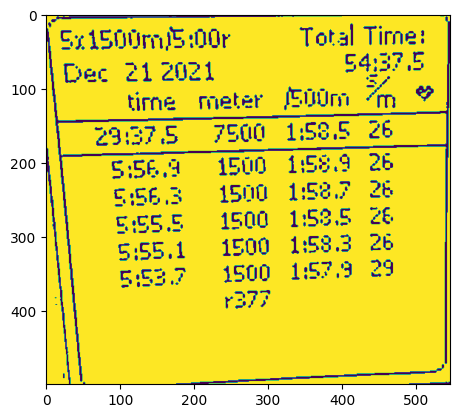

In [5]:
def noise_removal(image):
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

no_noise = noise_removal(bw_gaussian)
plt.imshow(no_noise)
cv2.imwrite("temp/no_noise.jpg", no_noise)
